In [57]:
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

In [58]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [59]:
app_test = pd.read_csv(DATASET_DIR / "application_test.csv")
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")

In [67]:
cols = ["TARGET", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]
app_train = app_train[cols]

In [68]:
y = app_train["TARGET"]
x = app_train.drop(["TARGET"], axis=1)

In [69]:
# ersätzt alle np.nan durch 0
x = x.fillna(0)

In [70]:
# unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

In [71]:
# logistisches Regressionsmodell
model = LogisticRegression(random_state=0, max_iter = 5000)

In [72]:
# Konfidenzlevel der einzelnen Klassen
y_score = model.fit(x_train, y_train).decision_function(x_test)

In [73]:
# Prognosewerte der Testdaten
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
# Prognosewerte der Testdaten in %
x_test_prob = model.predict_proba(x_test)
x_test_prob

array([[0.83827556, 0.16172444],
       [0.97507095, 0.02492905],
       [0.88023637, 0.11976363],
       ...,
       [0.97257279, 0.02742721],
       [0.95690146, 0.04309854],
       [0.92583812, 0.07416188]])

In [75]:
# Durchschnittliche Trefferwahrscheinlichkeit
model.score(x_test, y_test)

0.919424282629621

In [76]:
# Erstellung der AUC & ROC-Metrik
# Wahrscheinlichkeiten für keinen Kreditausfall
prob = x_test_prob[:,1]
auc = roc_auc_score(y_test, prob)
print(auc)
# FalsePositiveRate, TruePositiveRate & Treshold
fpr, tpr, threshold = roc_curve(y_test, prob)

0.6971580943010423


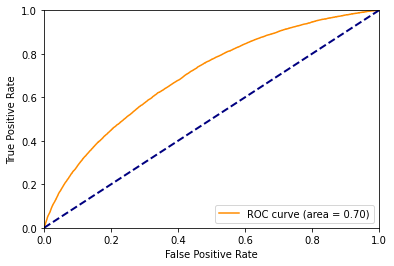

In [77]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [78]:
# Koeffizienten der einzelnen Klassen
coef_dict = {}
for coef, feat in zip(model.coef_[0], x.columns.values):
    coef_dict[feat] = coef

In [79]:
# Feature Importance
d = dict(sorted(coef_dict.items(), key=lambda item: item[1]))

for i,v in d.items():
    print('Feature: {}, Score: {}'.format(i,v))

Feature: EXT_SOURCE_2, Score: -2.388046908988924
Feature: EXT_SOURCE_3, Score: -1.4252701557210137
Feature: EXT_SOURCE_1, Score: -0.6994511282330801


<ipython-input-80-6e6be5dd64fe>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(tuple(t.index))


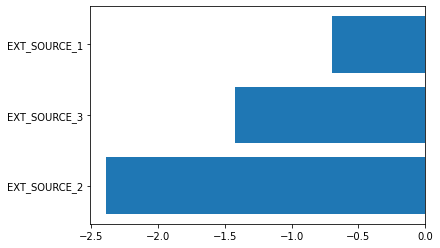

In [80]:
# Feature Importance visualisiert
t = pd.DataFrame.from_dict(d,orient="index",columns=["importance"])
t = t.sort_values(by="importance")
t = np.squeeze(t)

fig, ax = plt.subplots()
ax.barh(t.index, t.values)
ax.set_yticklabels(tuple(t.index))
plt.show()